<a href="https://colab.research.google.com/github/OumaimaHammadi/Deep-learning/blob/main/TP%20Programmation%20du%20premier%20neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


dimensions de X: (100, 2)
dimensions de y: (100, 1)


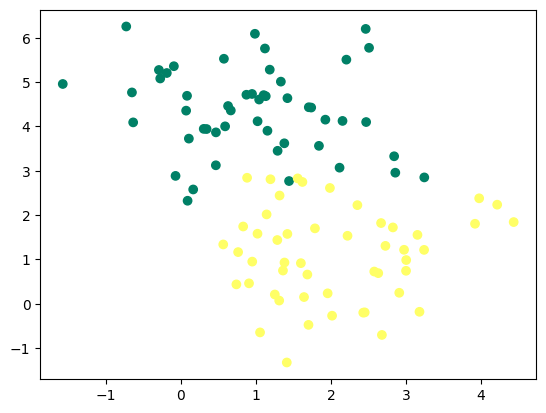

In [4]:
#1. Dataset

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()


In [5]:
#2. Fonctions du modèle


In [18]:
import numpy as np

def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)


In [19]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

In [20]:
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [21]:
def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [22]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)


In [23]:
def predict(X, W, b):
  A = model(X, W, b)
  # print(A)
  return A >= 0.5

In [24]:
from sklearn.metrics import accuracy_score


In [25]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  # initialisation W, b
  W, b = initialisation(X)
  Loss = []
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)

  y_pred = predict(X, W, b)
  print(accuracy_score(y, y_pred))
  plt.plot(Loss)
  plt.show()
  return (W, b)

0.92


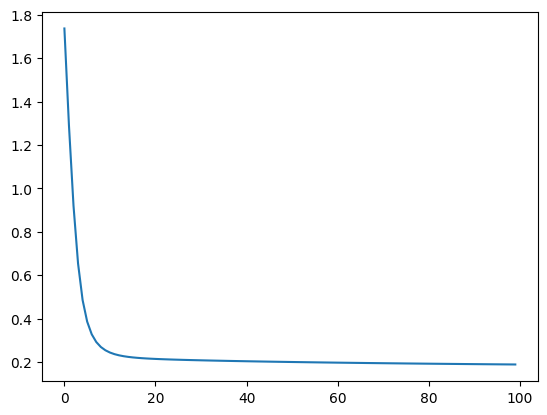

In [26]:
W, b = artificial_neuron(X, y)


In [27]:
#3. Frontière de décision

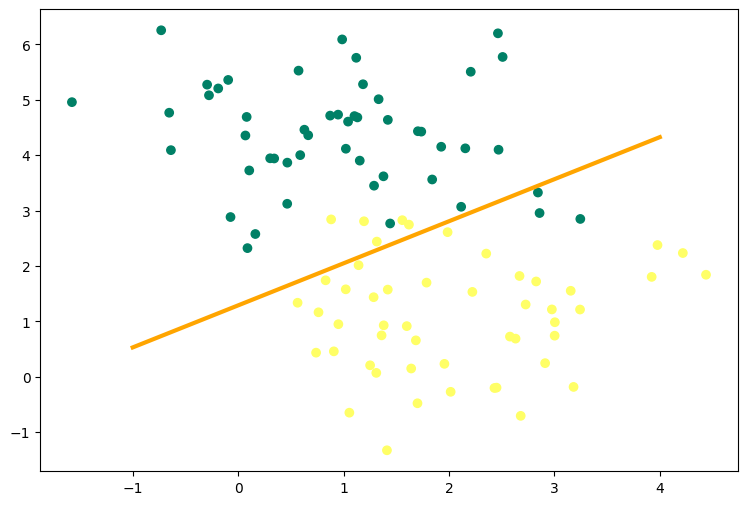

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)